<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/Woe_calculation_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=VrRMeSyB-eUYTJLk9TiBwbAysrtZUPFz2WYL1TCYHoM'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.

In [2]:
# pip install scorecardpy
!pip install git+https://github.com/CBravoR/scorecardpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CBravoR/scorecardpy to /tmp/pip-req-build-ls6949p3
  Running command git clone --filter=blob:none --quiet https://github.com/CBravoR/scorecardpy /tmp/pip-req-build-ls6949p3
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59549 sha256=606d66c3bfc18c69a4a863f3cdd7ee19f6ddc5ac38634649c19cf51733b999b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-m35_xxzp/wheels/61/36/7f/76fa329f36d896910f2251f5cfd54094c722e088b633e47f6f
Successfully built scorecardpy


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scorecardpy as sc
%matplotlib inline

In [4]:
%cd /content/gdrive/My Drive/Data/
# df = pd.read_csv("transformed_data.csv", low_memory=False, index_col=0)

/content/gdrive/My Drive/Data


In [5]:
train = pd.read_csv("Train.csv", low_memory=False, index_col=0)
test = pd.read_csv("Test.csv", low_memory=False, index_col=0)


In [ ]:
train.Default = train.Default.astype(float)
train.bank_dlq = train.bank_dlq.astype(float)
train.il_acc = train.il_acc.astype(float)
train.dtypes

In [7]:
train_mid_19 = train.iloc[:, 19:38]
train_mid_19["Default"] = train["Default"]
train_mid_19.columns
train_mid_19.info()      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848276 entries, 0 to 1280644
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   total_acc              848276 non-null  float64
 1   application_type       848276 non-null  object 
 2   dti_joint              848276 non-null  float64
 3   tot_coll_amt           848276 non-null  float64
 4   tot_cur_bal            848276 non-null  float64
 5   total_bal_il           848276 non-null  float64
 6   il_util                848276 non-null  float64
 7   acc_open_past_24mths   848276 non-null  float64
 8   avg_cur_bal            848276 non-null  float64
 9   bc_open_to_buy         848276 non-null  float64
 10  bc_util                848276 non-null  float64
 11  mort_acc               848276 non-null  float64
 12  mths_since_recent_bc   848276 non-null  float64
 13  mths_since_recent_inq  848276 non-null  float64
 14  num_accts_ever_120_pd  848276 non-n

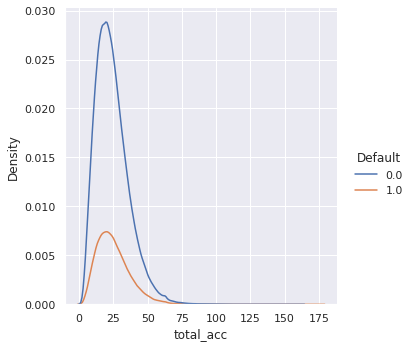

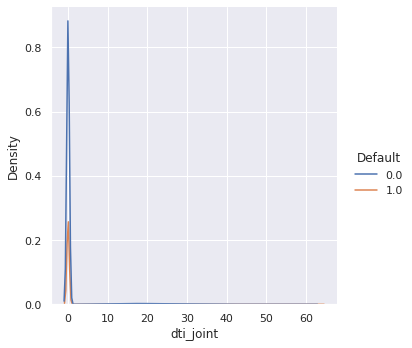

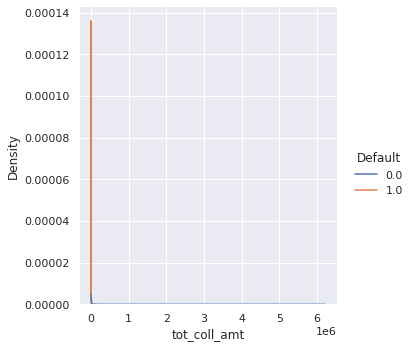

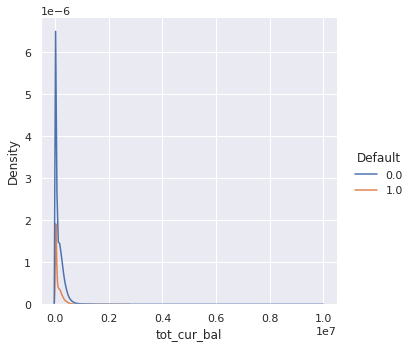

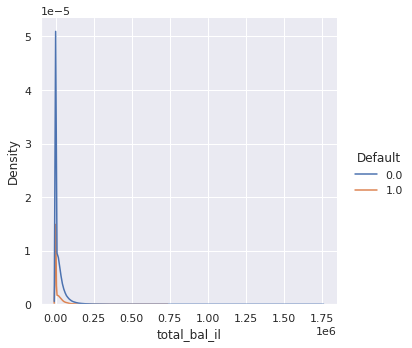

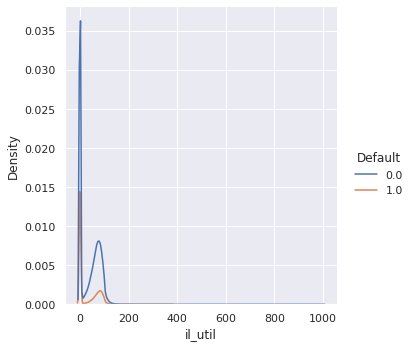

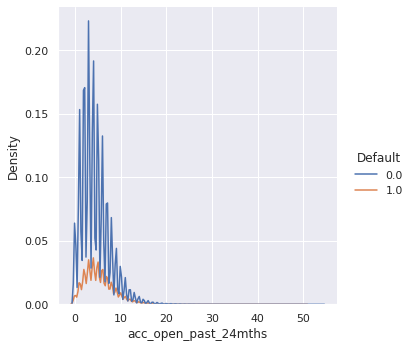

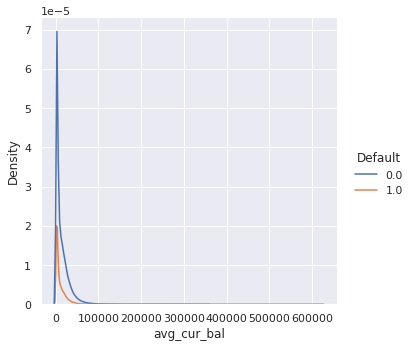

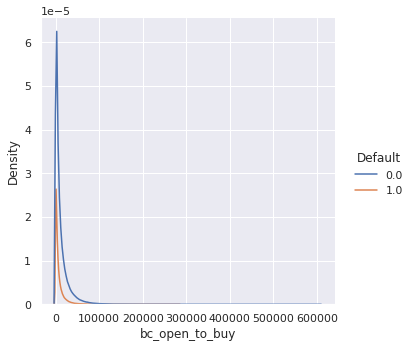

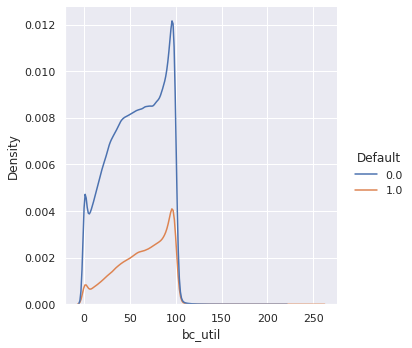

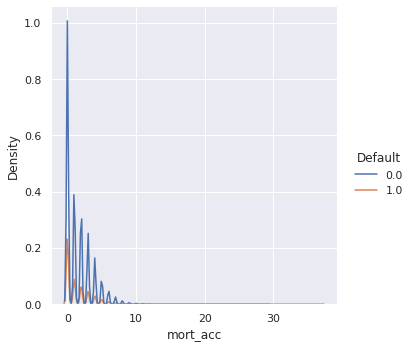

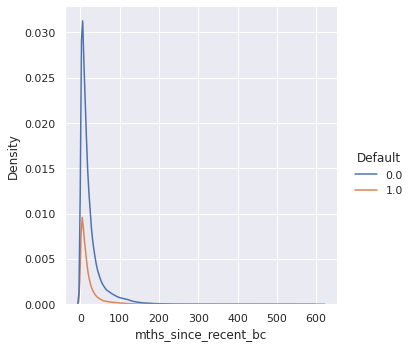

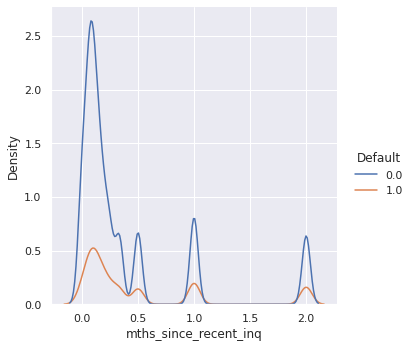

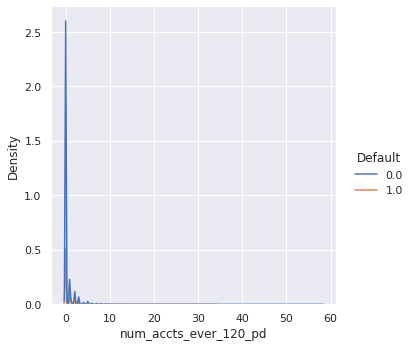

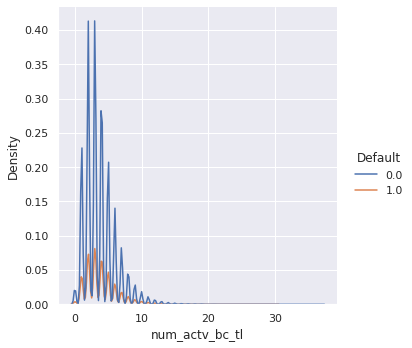

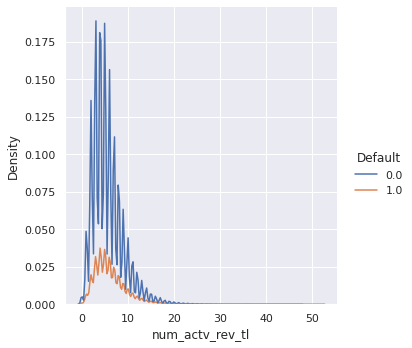

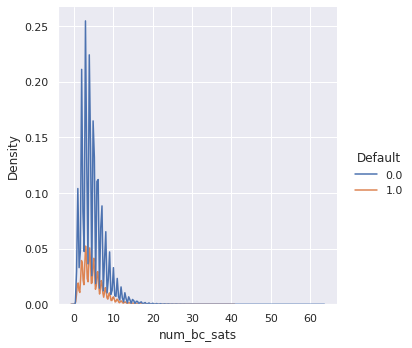

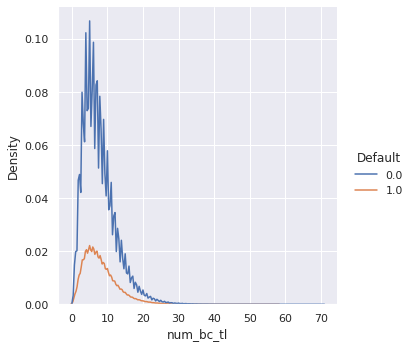

In [44]:
sns.set(color_codes=True)
num_list = []
for col_id in train_mid_19.columns[:-1]:
  if train_mid_19[col_id].dtype == "float64":
    num_list.append(col_id)
    sns.displot(data = train_mid_19, x = col_id, hue = "Default", kind = 'kde')

In [9]:
train_mid_19.describe()

,total_acc,dti_joint,tot_coll_amt,tot_cur_bal,total_bal_il,il_util,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,Default
count,848276.000000,848276.000000,8.482760e+05,8.482760e+05,8.482760e+05,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.00000
mean,24.321741,0.998668,2.345718e+02,1.402002e+05,2.205471e+04,36.739971,4.635430,13152.785152,11044.582049,58.406212,1.531887,24.208240,0.394704,0.503297,3.741803,5.727072,4.841438,7.810064,0.20655
std,12.026121,4.637651,9.059008e+03,1.585059e+05,3.881894e+04,38.749289,3.215532,15872.707970,16225.496916,28.531045,1.890410,31.534618,0.548886,1.354039,2.316304,3.402327,3.019562,4.699211,0.40483
min,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,16.000000,0.000000,0.000000e+00,2.897000e+04,0.000000e+00,0.000000,2.000000,3036.000000,1654.000000,36.000000,0.000000,6.000000,0.076923,0.000000,2.000000,3.000000,3.000000,4.000000,0.00000
50%,23.000000,0.000000,0.000000e+00,7.649400e+04,5.453000e+03,27.000000,4.000000,7069.000000,5236.000000,60.900000,1.000000,14.000000,0.166667,0.000000,3.000000,5.000000,4.000000,7.000000,0.00000
75%,31.000000,0.000000,0.000000e+00,2.094260e+05,3.018600e+04,74.000000,6.000000,18251.000000,13677.000000,83.600000,2.000000,29.000000,0.500000,0.000000,5.000000,7.000000,6.000000,10.000000,0.00000
max,176.000000,63.660000,6.214661e+06,9.971659e+06,1.754743e+06,1000.000000,54.000000,623229.000000,605996.000000,255.200000,37.000000,615.000000,2.000000,58.000000,37.000000,52.000000,63.000000,70.000000,1.00000


In [63]:
def outlier_analysis(df):
  df.loc[df["total_acc"]>100,"total_acc"] = 100
  df.loc[df["acc_open_past_24mths"]>40,"acc_open_past_24mths"] = 40
  df.loc[df["bc_open_to_buy"]>200000,"bc_open_to_buy"] = 200000
  df.loc[df["mths_since_recent_bc"]>120,"mths_since_recent_bc"] = 120
  df.loc[df["num_actv_bc_tl"]>20,"num_actv_bc_tl"] = 20
  df.loc[df["num_actv_rev_tl"]>30,"num_actv_rev_tl"] = 30
  df.loc[df["num_bc_sats"]>25,"num_bc_sats"] = 25
  df.loc[df["num_bc_tl"]>40,"num_bc_tl"] = 40
  return df

train_mid_19_tr = outlier_analysis(train_mid_19)
train_mid_19_tr.describe()

,total_acc,dti_joint,tot_coll_amt,tot_cur_bal,total_bal_il,il_util,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,Default
count,848276.000000,848276.000000,8.482760e+05,8.482760e+05,8.482760e+05,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.00000
mean,24.320022,0.998668,2.345718e+02,1.402002e+05,2.205471e+04,36.739971,4.635326,13152.785152,11036.410524,58.406212,1.531887,23.236310,0.394704,0.503297,3.741051,5.725949,4.838853,7.808758,0.20655
std,12.013238,4.637651,9.059008e+03,1.585059e+05,3.881894e+04,38.749289,3.214247,15872.707970,16098.446292,28.531045,1.890410,26.551765,0.548886,1.354039,2.310120,3.392971,2.998542,4.688789,0.40483
min,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,16.000000,0.000000,0.000000e+00,2.897000e+04,0.000000e+00,0.000000,2.000000,3036.000000,1654.000000,36.000000,0.000000,6.000000,0.076923,0.000000,2.000000,3.000000,3.000000,4.000000,0.00000
50%,23.000000,0.000000,0.000000e+00,7.649400e+04,5.453000e+03,27.000000,4.000000,7069.000000,5236.000000,60.900000,1.000000,14.000000,0.166667,0.000000,3.000000,5.000000,4.000000,7.000000,0.00000
75%,31.000000,0.000000,0.000000e+00,2.094260e+05,3.018600e+04,74.000000,6.000000,18251.000000,13677.000000,83.600000,2.000000,29.000000,0.500000,0.000000,5.000000,7.000000,6.000000,10.000000,0.00000
max,100.000000,63.660000,6.214661e+06,9.971659e+06,1.754743e+06,1000.000000,40.000000,623229.000000,200000.000000,255.200000,37.000000,120.000000,2.000000,58.000000,20.000000,30.000000,25.000000,40.000000,1.00000


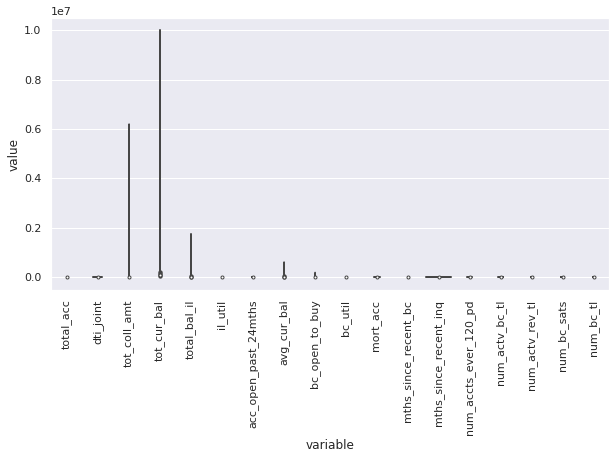

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(train_mid_19.loc[:,np.r_[num_list]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [67]:
train_mid_19_tr.to_pickle('Mid19Clean.pkl')

In [65]:
from scipy.stats import zscore

In [68]:
train_mid_19_tr[num_list] = train_mid_19_tr[num_list].apply(zscore)

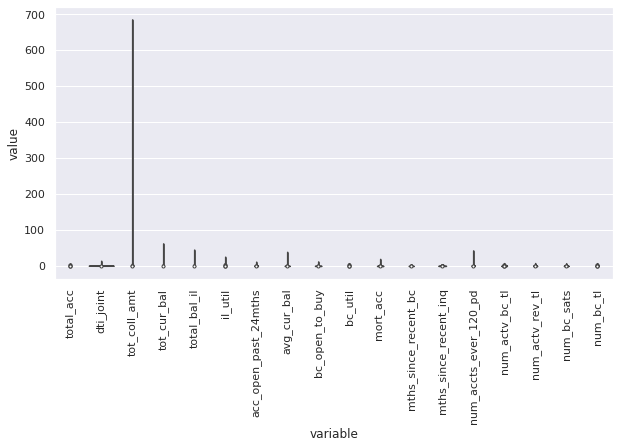

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(train_mid_19_tr.loc[:,np.r_[num_list]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [71]:
bins = sc.woebin(train_mid_19_tr, y = 'Default', 
                min_perc_fine_bin=0.01, # How many bins to cut initially into
                min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                stop_limit=0.02, # Minimum information value 
                max_num_bin=8, # Maximum number of bins
                method='tree'
                )

[INFO] creating woe binning ...
Binning on 848276 rows and 20 columns in 00:02:12


{'num_bc_sats': <Figure size 432x288 with 2 Axes>,
 'num_actv_bc_tl': <Figure size 432x288 with 2 Axes>,
 'total_acc': <Figure size 432x288 with 2 Axes>,
 'num_accts_ever_120_pd': <Figure size 432x288 with 2 Axes>,
 'avg_cur_bal': <Figure size 432x288 with 2 Axes>,
 'application_type': <Figure size 432x288 with 2 Axes>,
 'acc_open_past_24mths': <Figure size 432x288 with 2 Axes>,
 'bc_open_to_buy': <Figure size 432x288 with 2 Axes>,
 'tot_coll_amt': <Figure size 432x288 with 2 Axes>,
 'mort_acc': <Figure size 432x288 with 2 Axes>,
 'tot_cur_bal': <Figure size 432x288 with 2 Axes>,
 'dti_joint': <Figure size 432x288 with 2 Axes>,
 'total_bal_il': <Figure size 432x288 with 2 Axes>,
 'num_bc_tl': <Figure size 432x288 with 2 Axes>,
 'il_util': <Figure size 432x288 with 2 Axes>,
 'mths_since_recent_inq': <Figure size 432x288 with 2 Axes>,
 'mths_since_recent_bc': <Figure size 432x288 with 2 Axes>,
 'bc_util': <Figure size 432x288 with 2 Axes>,
 'num_actv_rev_tl': <Figure size 432x288 with 2 

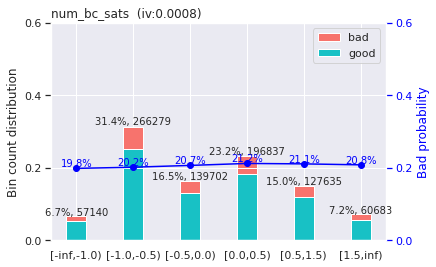

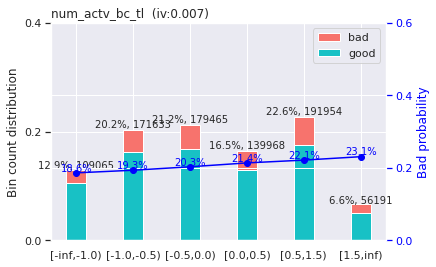

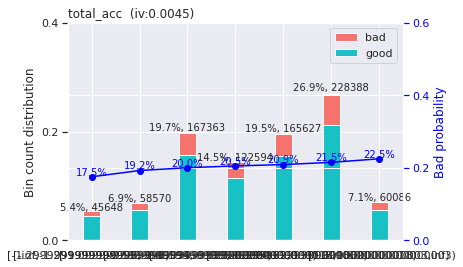

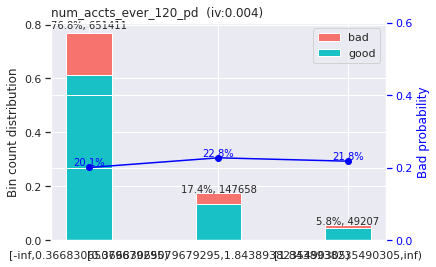

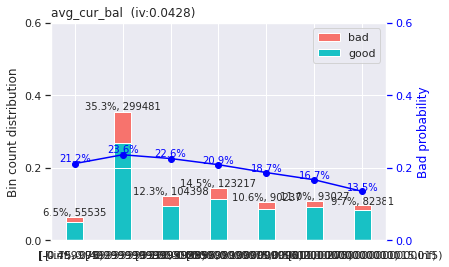

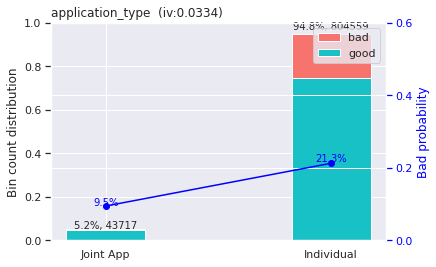

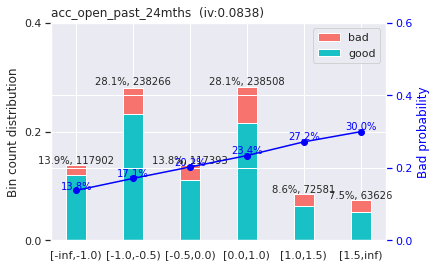

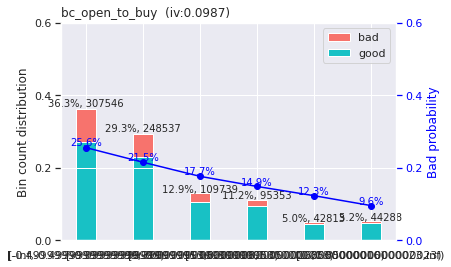

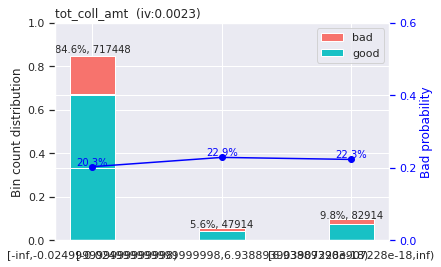

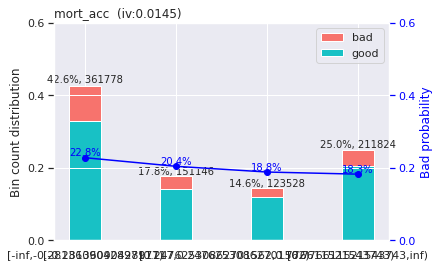

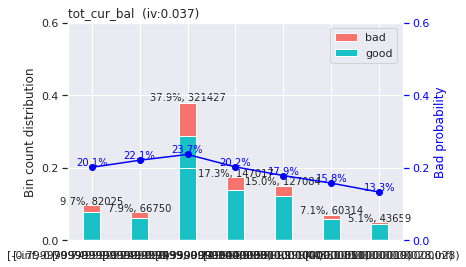

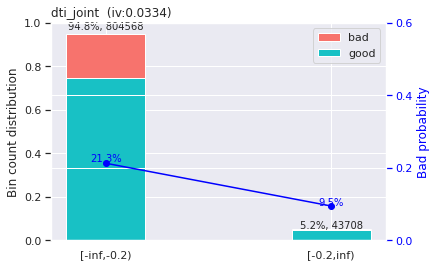

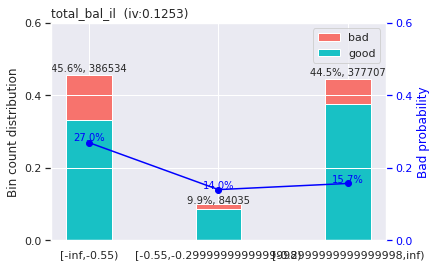

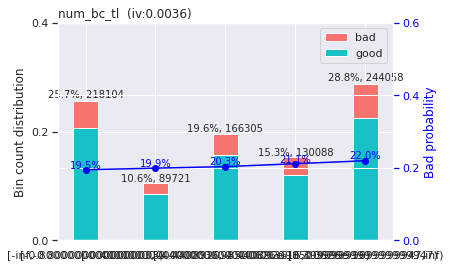

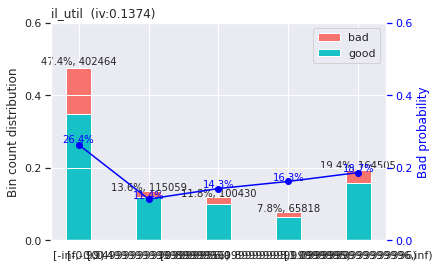

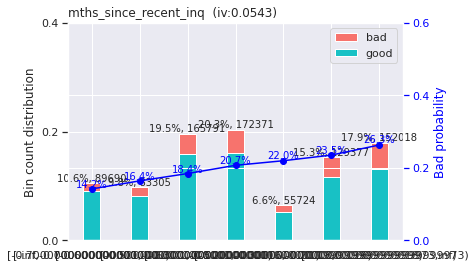

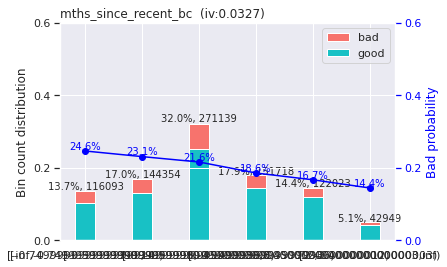

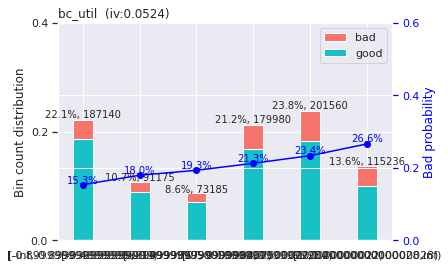

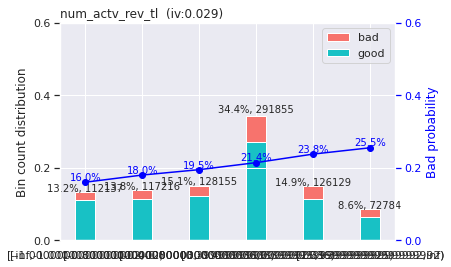

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins)

-------- 1/19 num_bc_sats --------
>>> dt[num_bc_sats].describe(): 
count    8.482760e+05
mean     1.096962e-16
std      1.000001e+00
min     -1.613736e+00
25%     -6.132494e-01
50%     -2.797538e-01
75%      3.872374e-01
max      6.723654e+00
Name: num_bc_sats, dtype: float64 



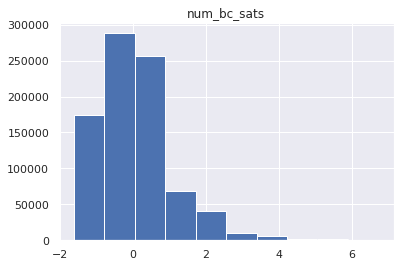

>>> Current breaks:
-1.0,-0.5,0.0,0.5,1.5 



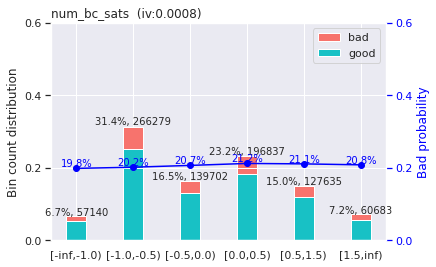

>>> Adjust breaks for (1/19) num_bc_sats?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/19 num_actv_bc_tl --------
>>> dt[num_actv_bc_tl].describe(): 
count    8.482760e+05
mean     4.791252e-17
std      1.000001e+00
min     -1.619420e+00
25%     -7.536632e-01
50%     -3.207850e-01
75%      5.449715e-01
max      7.038145e+00
Name: num_actv_bc_tl, dtype: float64 



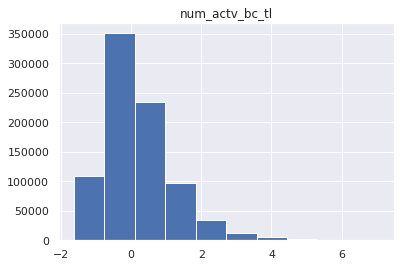

>>> Current breaks:
-1.0,-0.5,0.0,0.5,1.5 



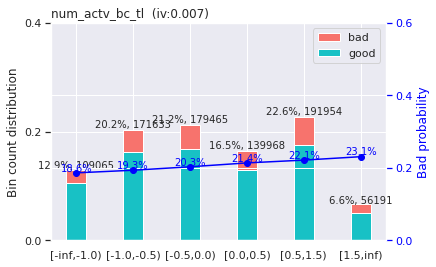

>>> Adjust breaks for (2/19) num_actv_bc_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/19 total_acc --------
>>> dt[total_acc].describe(): 
count    8.482760e+05
mean     4.486355e-17
std      1.000001e+00
min     -1.857953e+00
25%     -6.925716e-01
50%     -1.098807e-01
75%      5.560517e-01
max      6.299719e+00
Name: total_acc, dtype: float64 



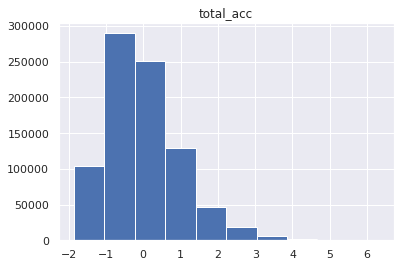

>>> Current breaks:
-1.2999999999999996,-1.0999999999999994,-0.599999999999999,-0.19999999999999862,0.3000000000000018,1.600000000000003 



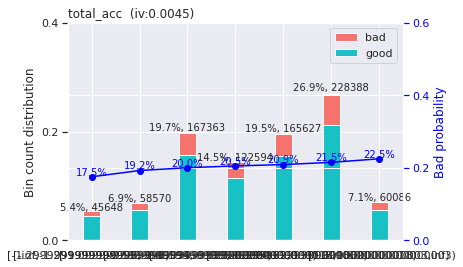

>>> Adjust breaks for (3/19) total_acc?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/19 num_accts_ever_120_pd --------
>>> dt[num_accts_ever_120_pd].describe(): 
count    8.482760e+05
mean     4.295375e-17
std      1.000001e+00
min     -3.717009e-01
25%     -3.717009e-01
50%     -3.717009e-01
75%     -3.717009e-01
max      4.246313e+01
Name: num_accts_ever_120_pd, dtype: float64 



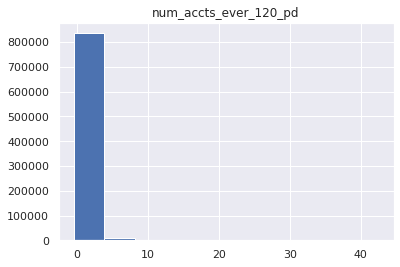

>>> Current breaks:
0.36683065079679295,1.8438938235490305 



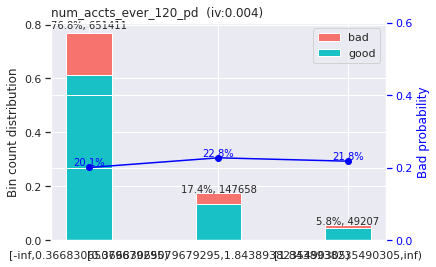

>>> Adjust breaks for (4/19) num_accts_ever_120_pd?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0.2, 1.4
[INFO] creating woe binning ...
>>> Current breaks:
1.4, 0.2 



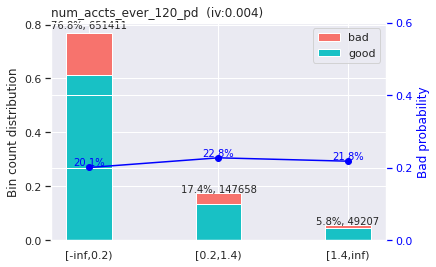

>>> Adjust breaks for (4/19) num_accts_ever_120_pd?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0.15,1.2
[INFO] creating woe binning ...
>>> Current breaks:
1.2, 0.15 



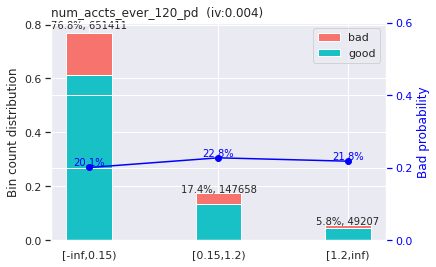

>>> Adjust breaks for (4/19) num_accts_ever_120_pd?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0.1,0.8
[INFO] creating woe binning ...
>>> Current breaks:
0.8, 0.1 



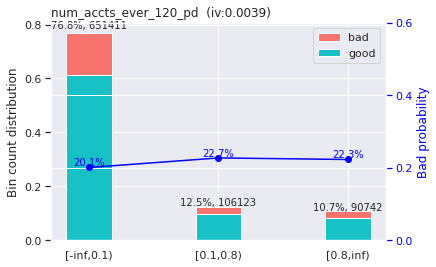

>>> Adjust breaks for (4/19) num_accts_ever_120_pd?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/19 avg_cur_bal --------
>>> dt[avg_cur_bal].describe(): 
count    8.482760e+05
mean     4.430233e-17
std      1.000001e+00
min     -8.286420e-01
25%     -6.373702e-01
50%     -3.832861e-01
75%      3.211940e-01
max      3.843557e+01
Name: avg_cur_bal, dtype: float64 



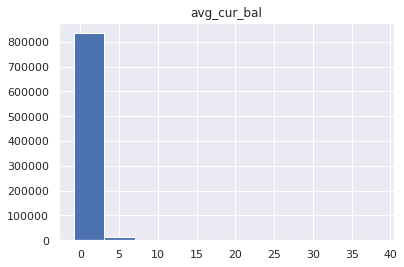

>>> Current breaks:
-0.75,-0.4999999999999998,-0.2999999999999996,0.10000000000000075,0.5000000000000011,1.2000000000000015 



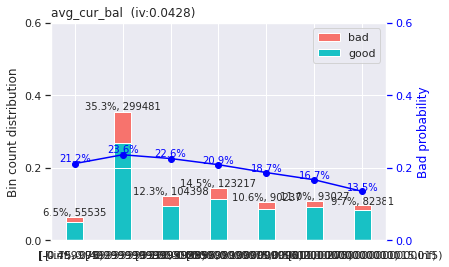

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.75, -0.49, 0.3, 1.2
[INFO] creating woe binning ...
>>> Current breaks:
-0.75, 1.2, -0.49, 0.3 



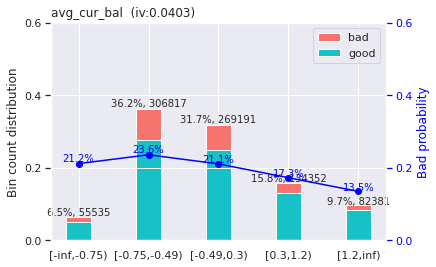

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.75, -0.55, -0.1, 0.8
[INFO] creating woe binning ...
>>> Current breaks:
-0.55, 0.8, -0.75, -0.1 



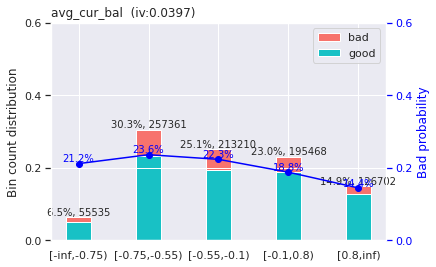

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.75, -0.55, 0.3
[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:10
>>> Current breaks:
-0.55, -0.75, 0.3 



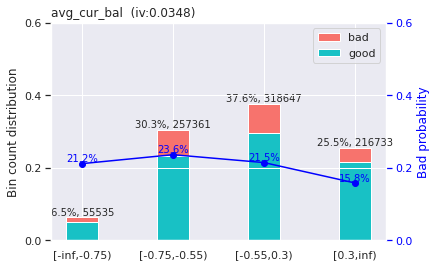

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.75, -0.2
[INFO] creating woe binning ...
>>> Current breaks:
-0.75, -0.2 



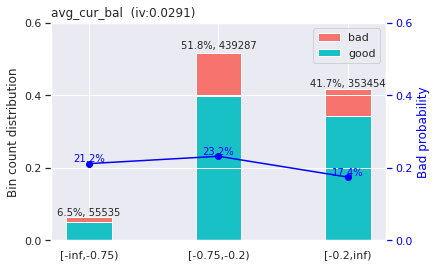

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.5, -0.2
[INFO] creating woe binning ...
>>> Current breaks:
-0.2, -0.5 



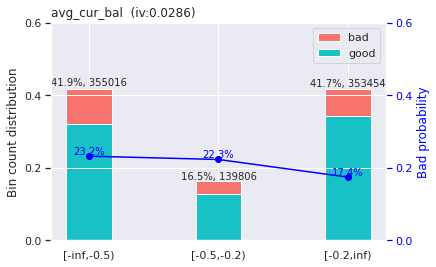

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.65, -0.45
[INFO] creating woe binning ...
>>> Current breaks:
-0.65, -0.45 



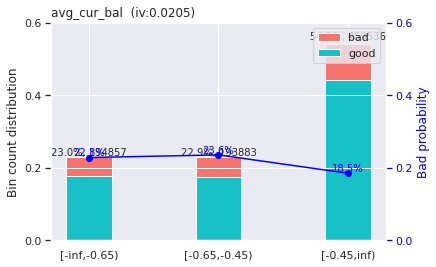

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.75, -0.55
[INFO] creating woe binning ...
>>> Current breaks:
-0.55, -0.75 



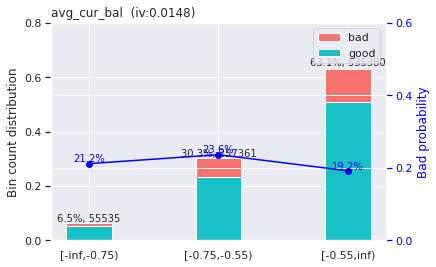

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.75, -0.65
[INFO] creating woe binning ...
>>> Current breaks:
-0.75, -0.65 



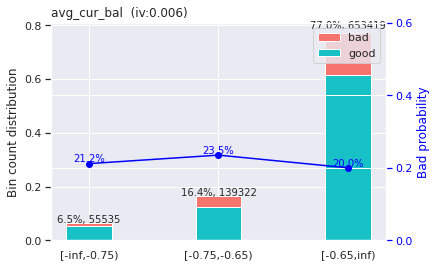

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: -0.75, 1.2, -0.49, 0.1, 0.5, 1.2
Input could not be converted to digit.
Selection: -0.75, -0.49, 0.1, 0.5, 1.2
Input could not be converted to digit.
Selection: 2
>>> Enter modified breaks: -0.75, -0.49, 0.1, 0.5, 1.2
[INFO] creating woe binning ...
>>> Current breaks:
0.1, 1.2, 0.5, -0.75, -0.49 



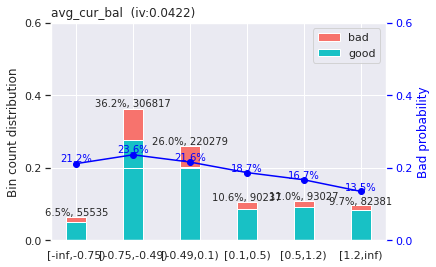

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.55, -0.49, 0.1, 0.5, 1.2
[INFO] creating woe binning ...
>>> Current breaks:
0.1, 1.2, -0.55, 0.5, -0.49 



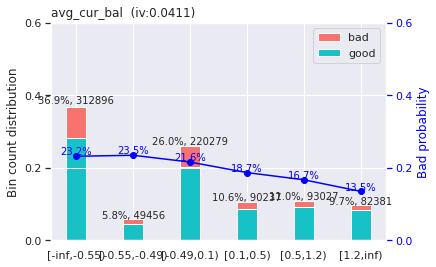

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: -0.6, -0.49, 0, 0.6, 1.2
Input could not be converted to digit.
Selection: 2
>>> Enter modified breaks: -0.6, -0.49, 0, 0.6, 1.2
[INFO] creating woe binning ...
>>> Current breaks:
0.0, 0.6, 1.2, -0.6, -0.49 



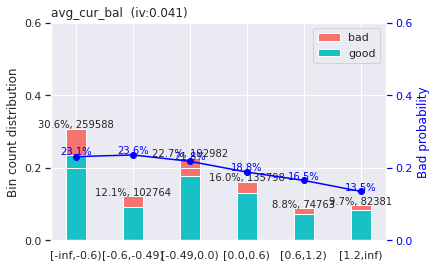

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.65, -0.49, 0, 0.6, 1.2
[INFO] creating woe binning ...
>>> Current breaks:
0.0, 0.6, 1.2, -0.65, -0.49 



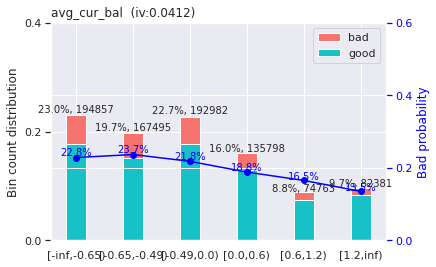

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.55, -0.45, 0, 0.6, 1
[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:10
>>> Current breaks:
1.0, 0.0, 0.6, -0.45, -0.55 



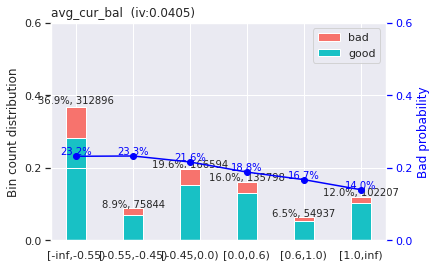

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.65, -0.3, 0.0, 0.6, 1.2
[INFO] creating woe binning ...
>>> Current breaks:
-0.3, 0.0, 0.6, 1.2, -0.65 



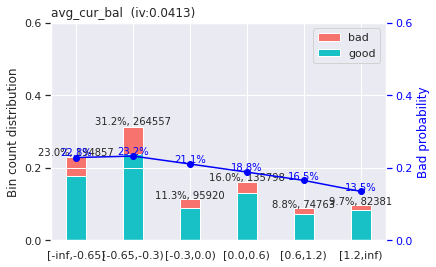

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: -0.55, -0.49, 0, 0.6, 1.2
Input could not be converted to digit.
Selection: 2
>>> Enter modified breaks: -0.55, -0.49, 0, 0.6, 1.2
[INFO] creating woe binning ...
>>> Current breaks:
0.0, 0.6, 1.2, -0.55, -0.49 



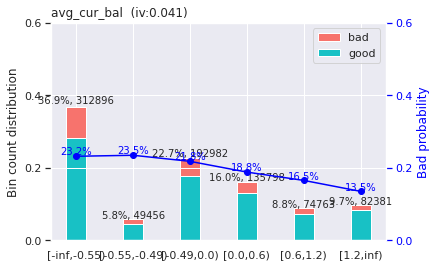

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.55, 0, 0.6, 1, 1.5
[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:10
>>> Current breaks:
1.0, 0.0, 0.6, 1.5, -0.55 



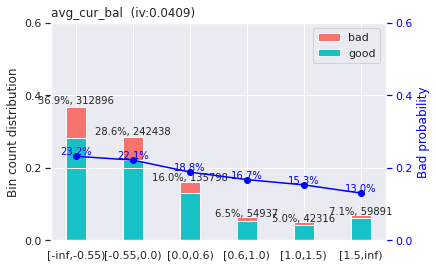

>>> Adjust breaks for (5/19) avg_cur_bal?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/19 application_type --------
>>> dt[application_type].describe(): 
count         848276
unique             2
top       Individual
freq          804559
Name: application_type, dtype: object 

>>> dt[application_type].value_counts(): 
Individual    804559
Joint App      43717
Name: application_type, dtype: int64 

>>> Current breaks:
'Joint App','Individual' 



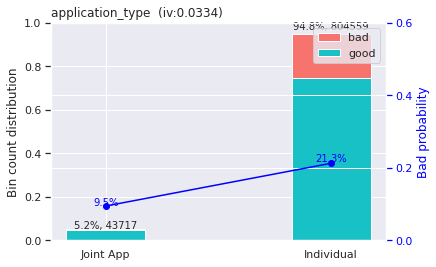

>>> Adjust breaks for (6/19) application_type?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 'Joint App','Individual'
[INFO] creating woe binning ...
>>> Current breaks:
'Joint App', 'Individual' 



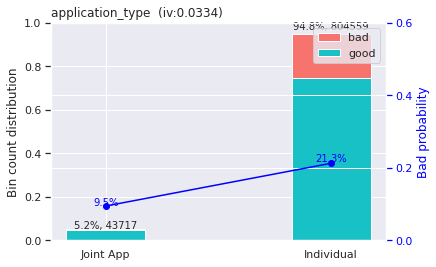

>>> Adjust breaks for (6/19) application_type?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/19 acc_open_past_24mths --------
>>> dt[acc_open_past_24mths].describe(): 
count    8.482760e+05
mean     1.273200e-16
std      1.000001e+00
min     -1.442120e+00
25%     -8.198896e-01
50%     -1.976596e-01
75%      4.245705e-01
max      1.100248e+01
Name: acc_open_past_24mths, dtype: float64 



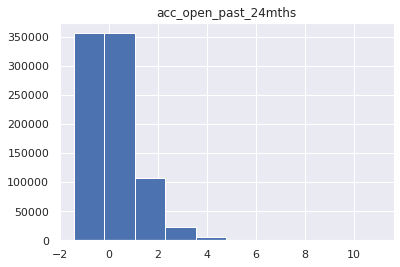

>>> Current breaks:
-1.0,-0.5,0.0,1.0,1.5 



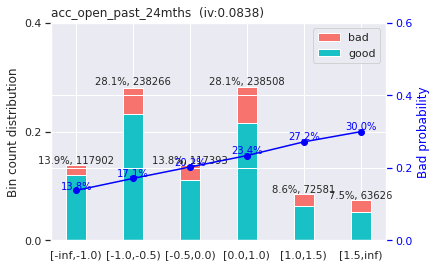

>>> Adjust breaks for (7/19) acc_open_past_24mths?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/19 bc_open_to_buy --------
>>> dt[bc_open_to_buy].describe(): 
count    8.482760e+05
mean    -3.642022e-17
std      1.000001e+00
min     -6.855579e-01
25%     -5.828150e-01
50%     -3.603089e-01
75%      1.640277e-01
max      1.173801e+01
Name: bc_open_to_buy, dtype: float64 



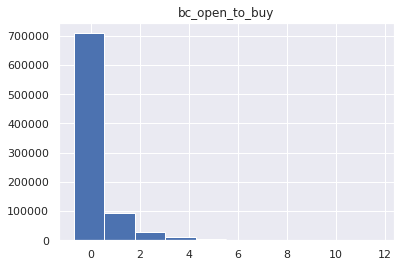

>>> Current breaks:
-0.4999999999999999,-0.09999999999999953,0.3000000000000008,1.0500000000000016,1.8500000000000023 



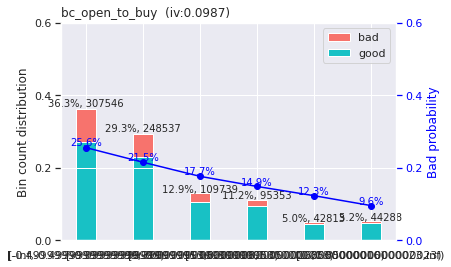

>>> Adjust breaks for (8/19) bc_open_to_buy?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/19 tot_coll_amt --------
>>> dt[tot_coll_amt].describe(): 
count    8.482760e+05
mean     3.074108e-18
std      1.000001e+00
min     -2.589378e-02
25%     -2.589378e-02
50%     -2.589378e-02
75%     -2.589378e-02
max      6.859945e+02
Name: tot_coll_amt, dtype: float64 



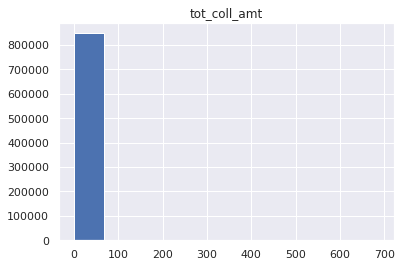

>>> Current breaks:
-0.024999999999999998,6.938893903907228e-18 



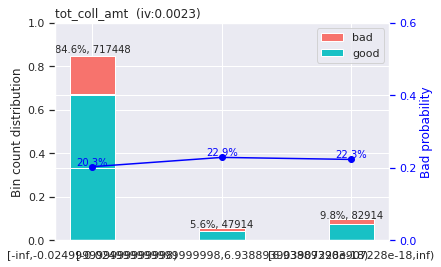

>>> Adjust breaks for (9/19) tot_coll_amt?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/19 mort_acc --------
>>> dt[mort_acc].describe(): 
count    8.482760e+05
mean    -1.826037e-18
std      1.000001e+00
min     -8.103471e-01
25%     -8.103471e-01
50%     -2.813609e-01
75%      2.476253e-01
max      1.876214e+01
Name: mort_acc, dtype: float64 



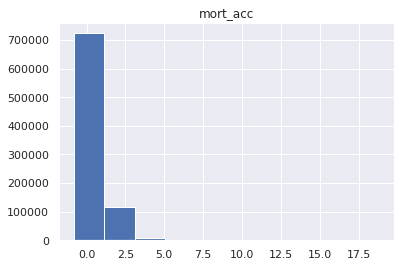

>>> Current breaks:
-0.2813609042897117,0.24762530862701562,0.776611521543743 



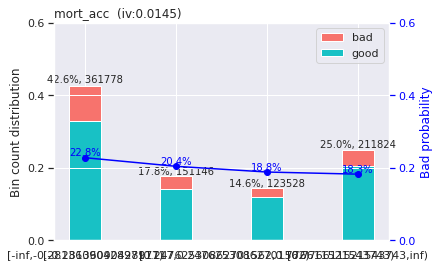

>>> Adjust breaks for (10/19) mort_acc?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.4, 0.24, 0.9
[INFO] creating woe binning ...
>>> Current breaks:
0.24, -0.4, 0.9 



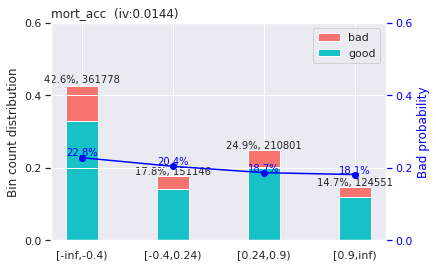

>>> Adjust breaks for (10/19) mort_acc?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -1, -0.1, 1, 2
[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:10
>>> Current breaks:
2.0, 1.0, -0.1 



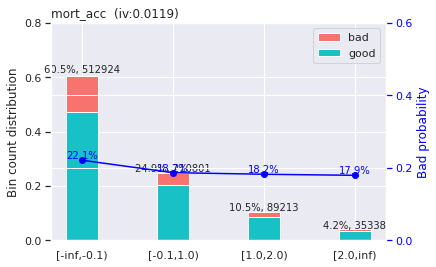

>>> Adjust breaks for (10/19) mort_acc?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -1.0, -0.1, 1, 2
[INFO] creating woe binning ...
>>> Current breaks:
2.0, 1.0, -0.1 



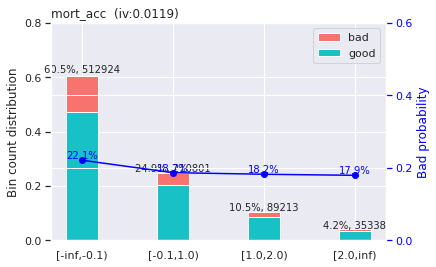

>>> Adjust breaks for (10/19) mort_acc?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.001, -0.9, 0, 1.2, 3.0
[INFO] creating woe binning ...
>>> Current breaks:
3.0, 1.2, -0.001 



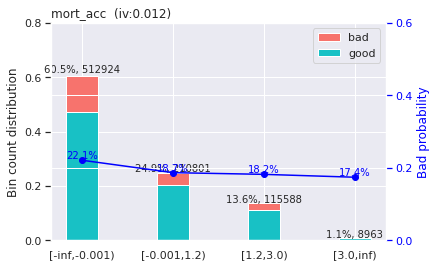

>>> Adjust breaks for (10/19) mort_acc?
1: next 
2: yes 
3: back
Selection: 1
-------- 11/19 tot_cur_bal --------
>>> dt[tot_cur_bal].describe(): 
count    8.482760e+05
mean     4.441122e-17
std      1.000001e+00
min     -8.845116e-01
25%     -7.017423e-01
50%     -4.019173e-01
75%      4.367398e-01
max      6.202587e+01
Name: tot_cur_bal, dtype: float64 



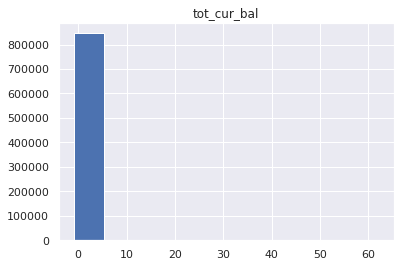

>>> Current breaks:
-0.7999999999999999,-0.7499999999999999,-0.24999999999999944,0.3500000000000011,1.1000000000000019,1.8500000000000028 



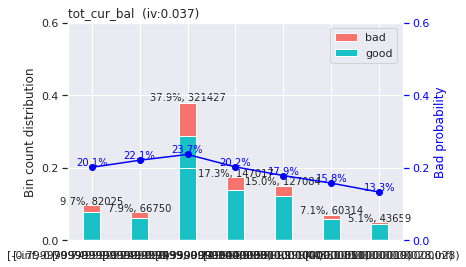

>>> Adjust breaks for (11/19) tot_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.7, -0.6, -0.5, -0.25, 2
[INFO] creating woe binning ...
>>> Current breaks:
-0.5, 2.0, -0.6, -0.25, -0.7 



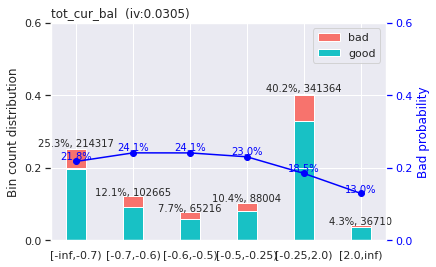

>>> Adjust breaks for (11/19) tot_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.75, -0.6, -0.25
[INFO] creating woe binning ...
>>> Current breaks:
-0.75, -0.6, -0.25 



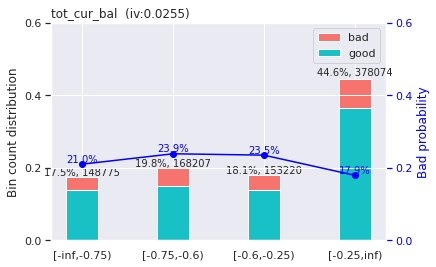

>>> Adjust breaks for (11/19) tot_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.75, -0.65, -0.45
[INFO] creating woe binning ...
>>> Current breaks:
-0.75, -0.65, -0.45 



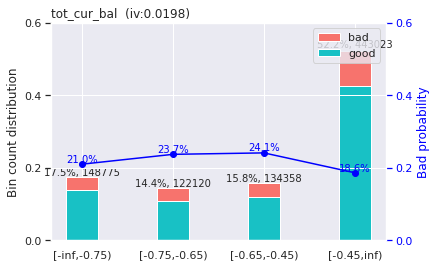

>>> Adjust breaks for (11/19) tot_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.8, -0.7, -0.35
[INFO] creating woe binning ...
>>> Current breaks:
-0.35, -0.7, -0.8 



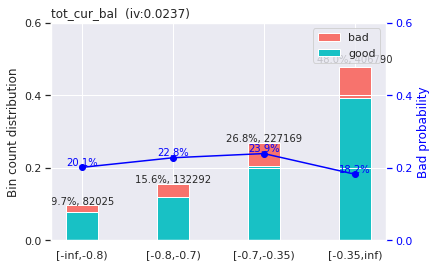

>>> Adjust breaks for (11/19) tot_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.8, -0.6, -0.45
[INFO] creating woe binning ...
>>> Current breaks:
-0.6, -0.45, -0.8 



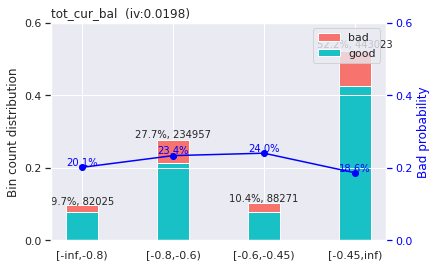

>>> Adjust breaks for (11/19) tot_cur_bal?
1: next 
2: yes 
3: back
Selection: 1
-------- 12/19 dti_joint --------
>>> dt[dti_joint].describe(): 
count    8.482760e+05
mean     3.082484e-18
std      1.000001e+00
min     -2.153393e-01
25%     -2.153393e-01
50%     -2.153393e-01
75%     -2.153393e-01
max      1.351145e+01
Name: dti_joint, dtype: float64 



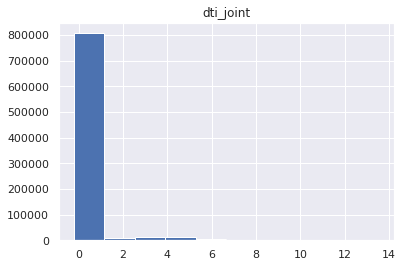

>>> Current breaks:
-0.2 



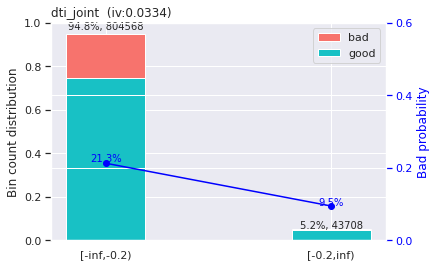

>>> Adjust breaks for (12/19) dti_joint?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.1
[INFO] creating woe binning ...
>>> Current breaks:
-0.1 



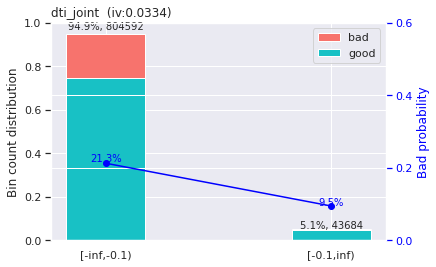

>>> Adjust breaks for (12/19) dti_joint?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.02
[INFO] creating woe binning ...
>>> Current breaks:
-0.02 



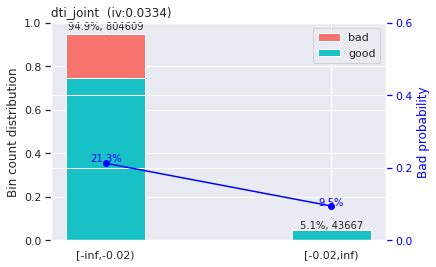

>>> Adjust breaks for (12/19) dti_joint?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 2
[INFO] creating woe binning ...
>>> Current breaks:
2.0 



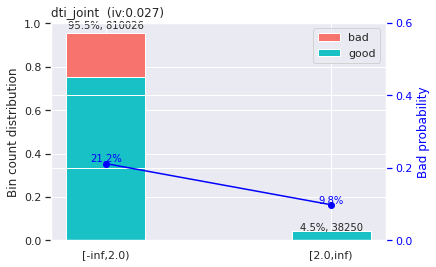

>>> Adjust breaks for (12/19) dti_joint?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.2
[INFO] creating woe binning ...
>>> Current breaks:
-0.2 



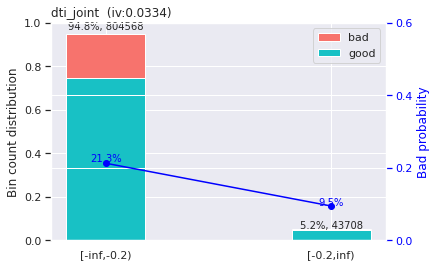

>>> Adjust breaks for (12/19) dti_joint?
1: next 
2: yes 
3: back
Selection: 1
-------- 13/19 total_bal_il --------
>>> dt[total_bal_il].describe(): 
count    8.482760e+05
mean    -1.876295e-17
std      1.000001e+00
min     -5.681434e-01
25%     -5.681434e-01
50%     -4.276706e-01
75%      2.094672e-01
max      4.463515e+01
Name: total_bal_il, dtype: float64 



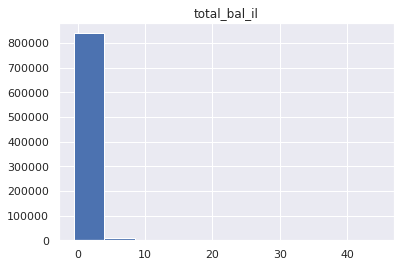

>>> Current breaks:
-0.55,-0.2999999999999998 



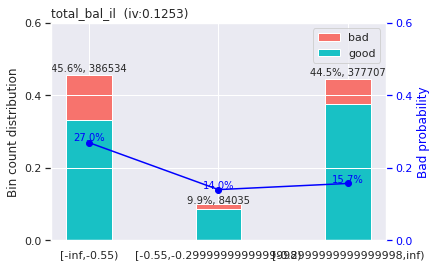

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.35, -0.1
[INFO] creating woe binning ...
>>> Current breaks:
-0.35, -0.1 



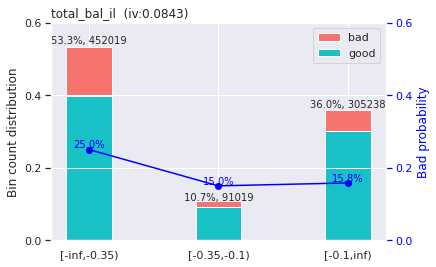

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.25, 0
[INFO] creating woe binning ...
>>> Current breaks:
0.0, -0.25 



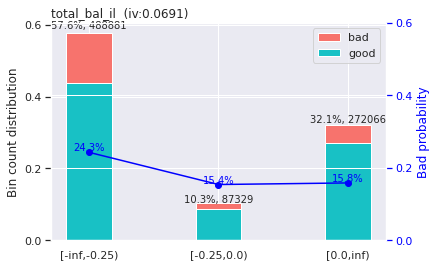

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.55, 0.5
[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:10
>>> Current breaks:
-0.55, 0.5 



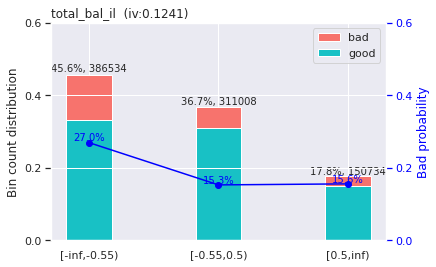

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.08, -0.01, -0.55, 0.3
[INFO] creating woe binning ...
>>> Current breaks:
-0.55, -0.08, 0.3, -0.01 



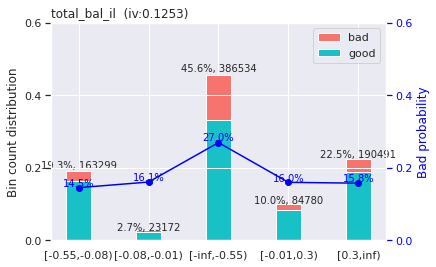

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -5, -0.55, -0.08, -0.1, 0.3
[INFO] creating woe binning ...
>>> Current breaks:
-0.55, -0.08, 0.3, -0.1 



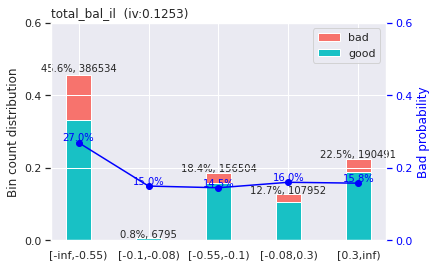

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.45, -0.05, 0.1
[INFO] creating woe binning ...
>>> Current breaks:
-0.05, 0.1, -0.45 



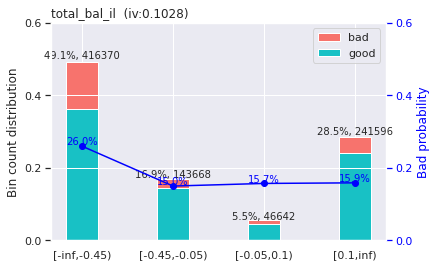

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -1.0, -0.45, -0.09, 0.1
[INFO] creating woe binning ...
>>> Current breaks:
0.1, -0.09, -0.45 



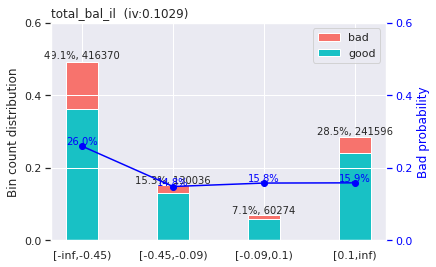

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.55
[INFO] creating woe binning ...
>>> Current breaks:
-0.55 



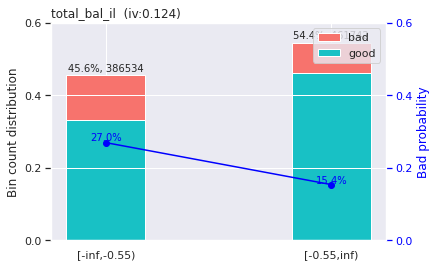

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.6
[INFO] creating woe binning ...
>>> Current breaks:
 



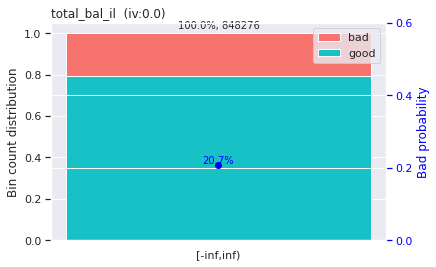

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.57
[INFO] creating woe binning ...
>>> Current breaks:
 



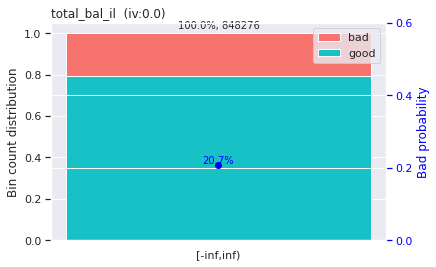

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0.555
[INFO] creating woe binning ...
>>> Current breaks:
0.555 



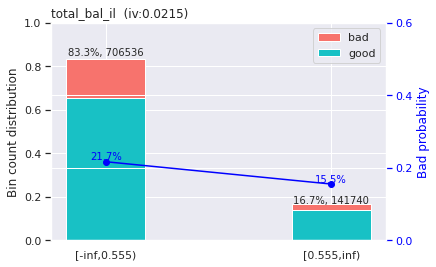

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.555
[INFO] creating woe binning ...
>>> Current breaks:
-0.555 



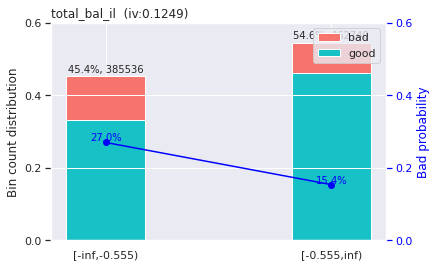

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.555555
[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:10
>>> Current breaks:
-0.555555 



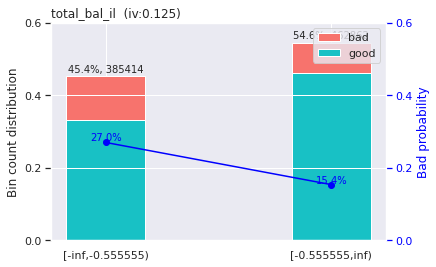

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0.554
[INFO] creating woe binning ...
>>> Current breaks:
0.554 



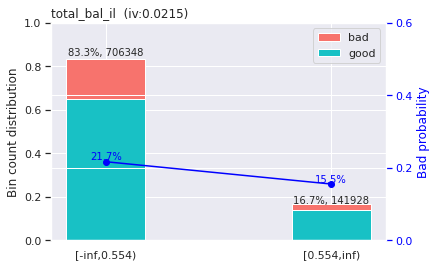

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.554
[INFO] creating woe binning ...
>>> Current breaks:
-0.554 



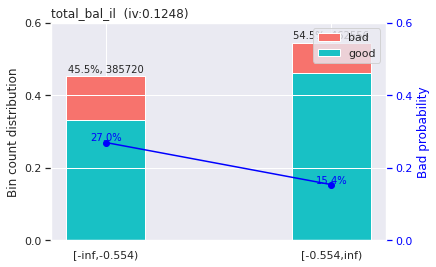

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.55554
[INFO] creating woe binning ...
>>> Current breaks:
-0.55554 



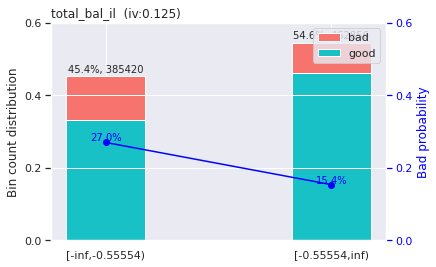

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.568
[INFO] creating woe binning ...
>>> Current breaks:
-0.568 



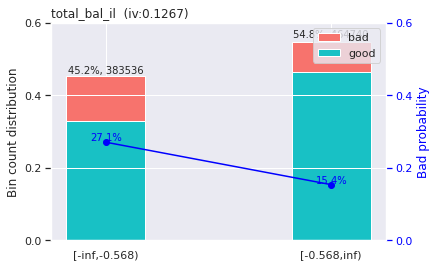

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.568, -0.45
[INFO] creating woe binning ...
>>> Current breaks:
-0.568, -0.45 



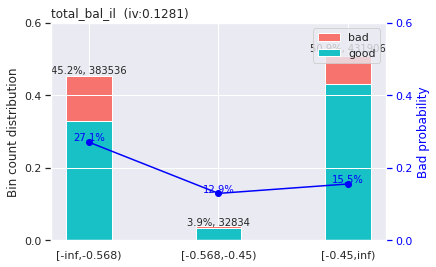

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: -0.568, -0.477, -0.2
Input could not be converted to digit.
Selection: 2
>>> Enter modified breaks: -0.568, -0.477, -0.2
[INFO] creating woe binning ...
>>> Current breaks:
-0.477, -0.568, -0.2 



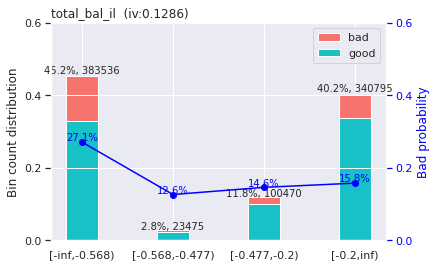

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.568, -0.477
[INFO] creating woe binning ...
>>> Current breaks:
-0.477, -0.568 



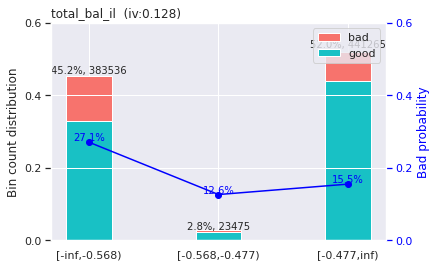

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.5685
[INFO] creating woe binning ...
>>> Current breaks:
 



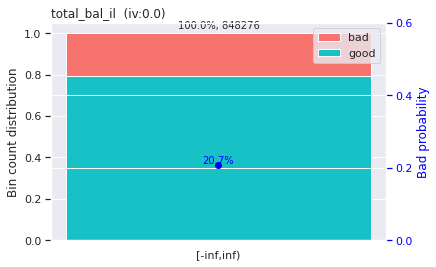

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.56813
[INFO] creating woe binning ...
>>> Current breaks:
-0.56813 



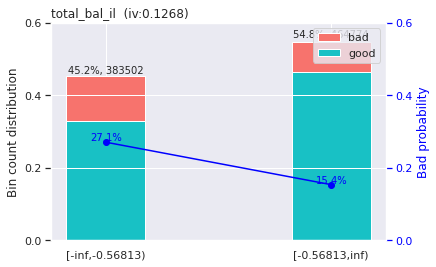

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.568131
[INFO] creating woe binning ...
>>> Current breaks:
-0.568131 



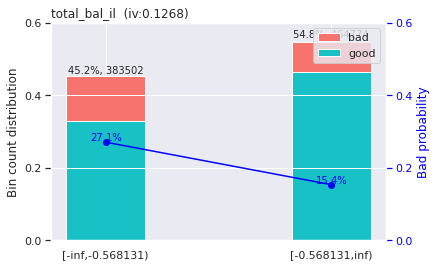

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: -0.56814340
Input could not be converted to digit.
Selection: 2
>>> Enter modified breaks: -0.56814340
[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:10
>>> Current breaks:
 



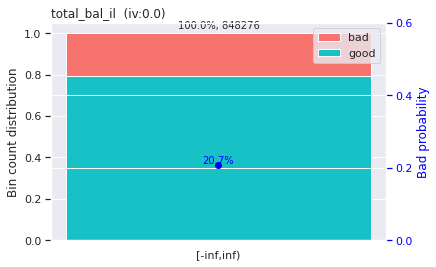

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.56814345
[INFO] creating woe binning ...
>>> Current breaks:
 



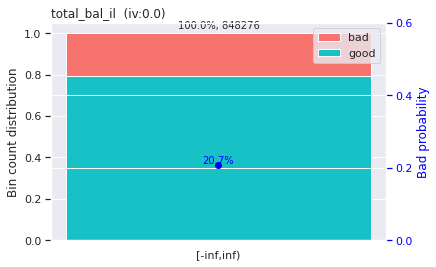

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: -0.568
Input could not be converted to digit.
Selection: 2
>>> Enter modified breaks: -0.568
[INFO] creating woe binning ...
>>> Current breaks:
-0.568 



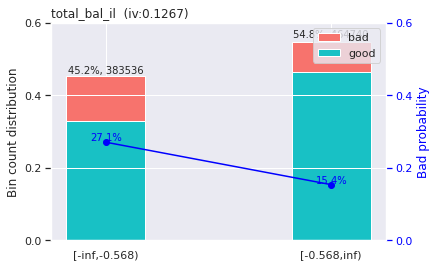

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.568, -0.45
[INFO] creating woe binning ...
>>> Current breaks:
-0.568, -0.45 



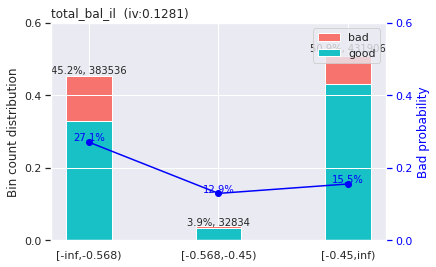

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.568, -0.1
[INFO] creating woe binning ...
>>> Current breaks:
-0.568, -0.1 



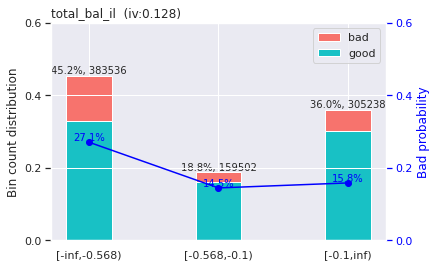

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.568, 1
[INFO] creating woe binning ...
>>> Current breaks:
-0.568, 1.0 



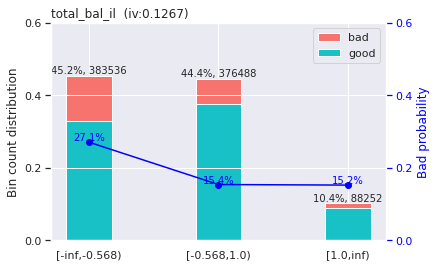

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.568, 0.5, 1.5
[INFO] creating woe binning ...
>>> Current breaks:
0.5, -0.568, 1.5 



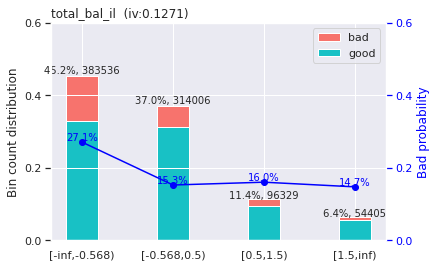

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.568, 0.5, 1.2
[INFO] creating woe binning ...
>>> Current breaks:
0.5, 1.2, -0.568 



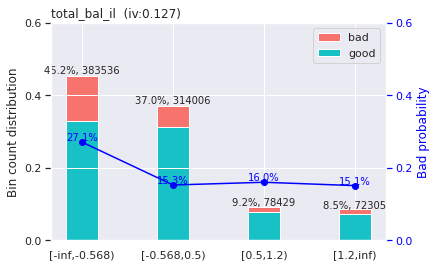

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: -0.568, 1.0
[INFO] creating woe binning ...
>>> Current breaks:
-0.568, 1.0 



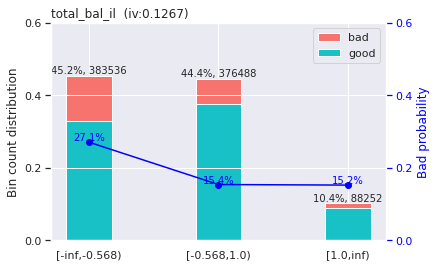

>>> Adjust breaks for (13/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 1
-------- 14/19 num_bc_tl --------
>>> dt[num_bc_tl].describe(): 
count    8.482760e+05
mean     1.051395e-16
std      1.000001e+00
min     -1.452137e+00
25%     -8.123122e-01
50%     -1.724877e-01
75%      4.673368e-01
max      6.865582e+00
Name: num_bc_tl, dtype: float64 



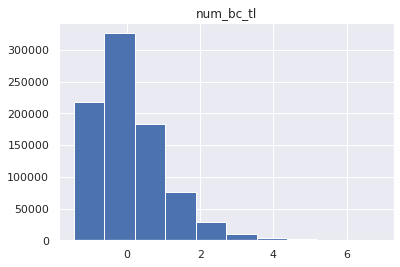

>>> Current breaks:
-0.8000000000000003,-0.40000000000000036,-4.440892098500626e-16,0.39999999999999947 



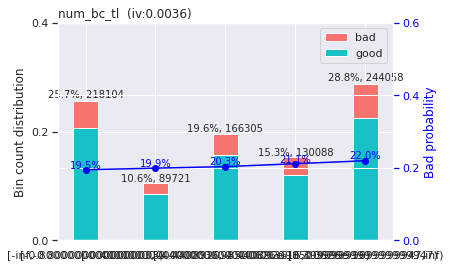

>>> Adjust breaks for (14/19) num_bc_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 15/19 il_util --------
>>> dt[il_util].describe(): 
count    8.482760e+05
mean     2.669699e-16
std      1.000001e+00
min     -9.481463e-01
25%     -9.481463e-01
50%     -2.513589e-01
75%      9.615673e-01
max      2.485879e+01
Name: il_util, dtype: float64 



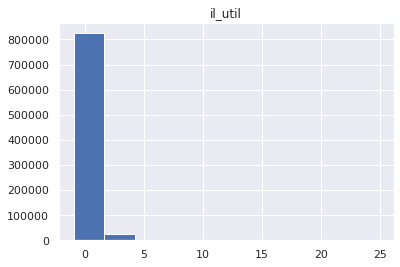

>>> Current breaks:
-0.9,0.49999999999999956,0.8999999999999995,1.0999999999999996 



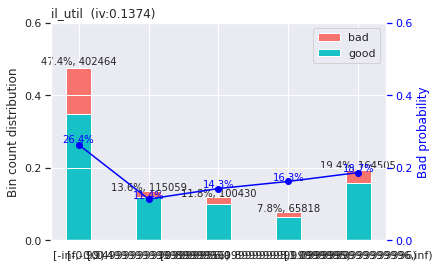

>>> Adjust breaks for (15/19) il_util?
1: next 
2: yes 
3: back
Selection: 1
-------- 16/19 mths_since_recent_inq --------
>>> dt[mths_since_recent_inq].describe(): 
count    8.482760e+05
mean    -2.126914e-16
std      1.000001e+00
min     -7.190994e-01
25%     -5.789555e-01
50%     -4.154541e-01
75%      1.918365e-01
max      2.924644e+00
Name: mths_since_recent_inq, dtype: float64 



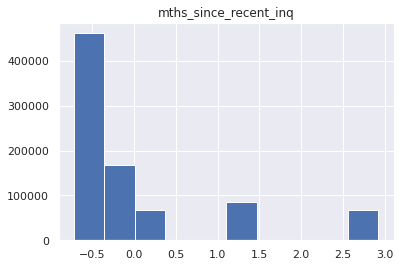

>>> Current breaks:
-0.7000000000000001,-0.6000000000000001,-0.5000000000000001,-0.30000000000000016,-0.20000000000000018,0.19999999999999973 



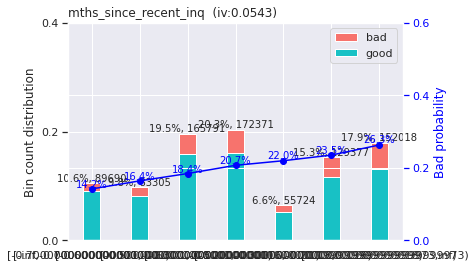

>>> Adjust breaks for (16/19) mths_since_recent_inq?
1: next 
2: yes 
3: back
Selection: 1
-------- 17/19 mths_since_recent_bc --------
>>> dt[mths_since_recent_bc].describe(): 
count    8.482760e+05
mean    -2.546400e-17
std      1.000001e+00
min     -8.751329e-01
25%     -6.491591e-01
50%     -3.478607e-01
75%      2.170738e-01
max      3.644343e+00
Name: mths_since_recent_bc, dtype: float64 



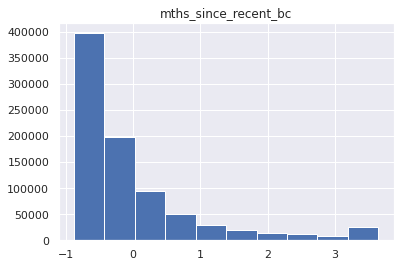

>>> Current breaks:
-0.7499999999999999,-0.5999999999999998,-0.14999999999999936,0.4500000000000012,2.400000000000003 



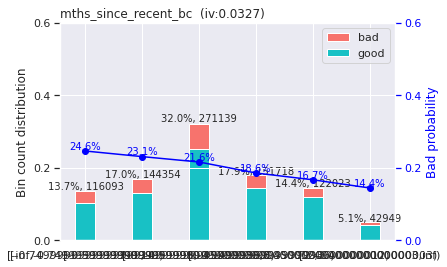

>>> Adjust breaks for (17/19) mths_since_recent_bc?
1: next 
2: yes 
3: back
Selection: 1
-------- 18/19 bc_util --------
>>> dt[bc_util].describe(): 
count    8.482760e+05
mean     2.205986e-16
std      1.000001e+00
min     -2.047112e+00
25%     -7.853279e-01
50%      8.740616e-02
75%      8.830312e-01
max      6.897536e+00
Name: bc_util, dtype: float64 



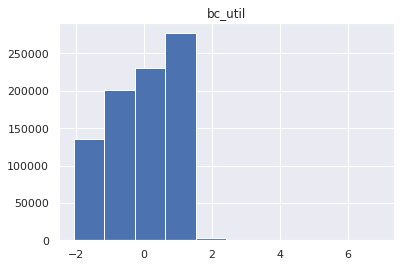

>>> Current breaks:
-0.899999999999999,-0.49999999999999867,-0.1999999999999984,0.5000000000000022,1.2000000000000028 



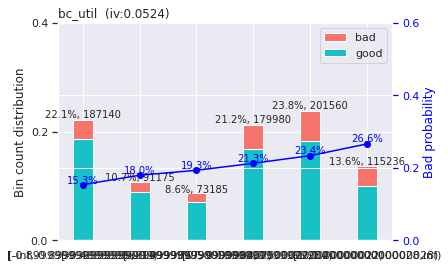

>>> Adjust breaks for (18/19) bc_util?
1: next 
2: yes 
3: back
Selection: 1
-------- 19/19 num_actv_rev_tl --------
>>> dt[num_actv_rev_tl].describe(): 
count    8.482760e+05
mean    -1.033302e-16
std      1.000001e+00
min     -1.687592e+00
25%     -8.034111e-01
50%     -2.139568e-01
75%      3.754974e-01
max      7.154221e+00
Name: num_actv_rev_tl, dtype: float64 



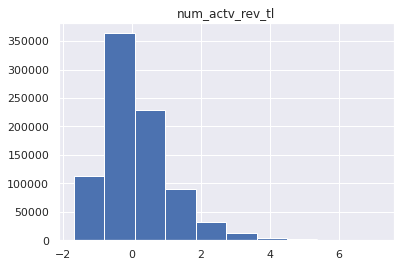

>>> Current breaks:
-1.0000000000000002,-0.8000000000000003,-0.40000000000000036,0.39999999999999925,1.3999999999999992 



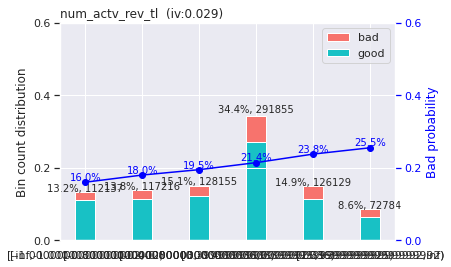

>>> Adjust breaks for (19/19) num_actv_rev_tl?
1: next 
2: yes 
3: back
Selection: 1


In [74]:
breaks_adj = sc.woebin_adj(train_mid_19_tr, "Default", bins, adj_all_var=True)

In [79]:
print(breaks_adj)

{'acc_open_past_24mths': [-1.0,-0.5,0.0,1.0,1.5], 'application_type': ['Joint App','Individual'], 'avg_cur_bal': [-0.55, 0, 0.6, 1, 1.5], 'bc_open_to_buy': [-0.4999999999999999,-0.09999999999999953,0.3000000000000008,1.0500000000000016,1.8500000000000023], 'bc_util': [-0.899999999999999,-0.49999999999999867,-0.1999999999999984,0.5000000000000022,1.2000000000000028], 'dti_joint': [-0.2], 'il_util': [-0.9,0.49999999999999956,0.8999999999999995,1.0999999999999996], 'mort_acc': [-0.001, -0.9, 0, 1.2, 3.0], 'mths_since_recent_bc': [-0.7499999999999999,-0.5999999999999998,-0.14999999999999936,0.4500000000000012,2.400000000000003], 'mths_since_recent_inq': [-0.7000000000000001,-0.6000000000000001,-0.5000000000000001,-0.30000000000000016,-0.20000000000000018,0.19999999999999973], 'num_accts_ever_120_pd': [0.1,0.8], 'num_actv_bc_tl': [-1.0,-0.5,0.0,0.5,1.5], 'num_actv_rev_tl': [-1.0000000000000002,-0.8000000000000003,-0.40000000000000036,0.39999999999999925,1.3999999999999992], 'num_bc_sats': [